In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{cmbright}')
rc('font', **{'family': 'sans-serif', 'sans-serif': ['Helvetica']})

%matplotlib inline

# This enables SVG graphics inline. 
%config InlineBackend.figure_formats = {'png', 'retina'}

rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style("dark")

mpl.rcParams['xtick.labelsize'] = 16 
mpl.rcParams['ytick.labelsize'] = 16 
mpl.rcParams['legend.fontsize'] = 14


res = pd.read_csv('../data/master_table.tsv', sep='\t', index_col=0)
res = res[res.chromosome_name != 'MtDNA']
res = res[(res.padj_58 < 0.05) | (res.padj_50 < 0.05)]

df = pd.read_csv('/Users/davidangeles/Documents/matrix.csv')

In [43]:
c = [c for c in df.columns if 'tph1' not in c]
df = df[c]
df = df[sorted(df.columns)[-6:-3] + sorted(df.columns)[0:3] + sorted(df.columns)[-3:] + sorted(df.columns)[3:6]]
df = np.log10(df / df.sum(axis=0) * 10 ** 6)
df.head()

,cnt50.1_S1_L001_R1_001,cnt50.2_S2_L001_R1_001,cnt50.3_S3_L001_R1_001,ascr50.1_S4_L001_R1_001,ascr50.2_S5_L001_R1_001,ascr50.3_S6_L001_R1_001,cnt58.1_S7_L001_R1_001,cnt58.2_S8_L001_R1_001,cnt58.3_S9_L001_R1_001,ascr58.1_S10_L001_R1_001,ascr58.2_S11_L001_R1_001,ascr58.3_S12_L001_R1_001
WBGene00000001,1.804216,1.806938,1.834171,1.801196,1.803592,1.794293,1.932386,1.937716,1.945838,1.929080,1.927554,1.943492
WBGene00000002,0.584929,0.675659,0.795318,0.699898,0.631482,0.679446,0.252079,0.349814,0.390338,0.414264,0.334758,0.401087
WBGene00000003,1.055034,1.038837,1.008447,1.110409,1.082723,1.075585,0.743166,0.709296,0.720879,0.670098,0.675134,0.613901
WBGene00000004,1.092941,1.065733,1.071365,1.042872,0.998946,1.019137,1.271236,1.284826,1.249739,1.218546,1.210817,1.207068
WBGene00000005,0.830347,0.761288,0.811208,0.908174,0.877077,0.892826,0.644879,0.612386,0.601191,0.717812,0.685274,0.738840


In [44]:
treatment = {c: 'control' if 'cnt' in c else 'ascr' for c in df.columns}
time = {c: '50' if '50' in c else '58' for c in df.columns}

In [45]:
melted = df.reset_index().melt(id_vars='index', var_name='Sample', value_name='counts')
melted.rename({'index': 'ensembl_gene_id'}, axis=1, inplace=True)
melted['treatment'] = melted.Sample.map(treatment)
melted['time'] = melted.Sample.map(time)

In [46]:
melted

,ensembl_gene_id,Sample,counts,treatment,time
0,WBGene00000001,cnt50.1_S1_L001_R1_001,1.804216,control,50
1,WBGene00000002,cnt50.1_S1_L001_R1_001,0.584929,control,50
2,WBGene00000003,cnt50.1_S1_L001_R1_001,1.055034,control,50
3,WBGene00000004,cnt50.1_S1_L001_R1_001,1.092941,control,50
4,WBGene00000005,cnt50.1_S1_L001_R1_001,0.830347,control,50
...,...,...,...,...,...
555031,WBGene00304215,ascr58.3_S12_L001_R1_001,-0.954300,ascr,58
555032,WBGene00304219,ascr58.3_S12_L001_R1_001,-0.152988,ascr,58
555033,WBGene00304220,ascr58.3_S12_L001_R1_001,-0.285294,ascr,58
555034,WBGene00304237,ascr58.3_S12_L001_R1_001,-0.954300,ascr,58


In [47]:
res[(res.padj_58 < 0.05) & (res.external_gene_name.str.contains('abu'))].sort_values('padj_58')[['external_gene_name', 'log2FoldChange_50', 'padj_50', 'log2FoldChange_58', 'padj_58']]

,external_gene_name,log2FoldChange_50,padj_50,log2FoldChange_58,padj_58
WBGene00004099,abu-15,-0.332996,3.957020e-05,-3.326630,0.000006
WBGene00000031,abu-8,-0.422472,5.151622e-12,-2.041212,0.000015
WBGene00004174,abu-14,-0.423656,1.983580e-18,-1.706014,0.000102
WBGene00000029,abu-6,-0.268529,1.188577e-02,-5.191661,0.004636
WBGene00000030,abu-7,-0.271373,5.722715e-03,-2.604683,0.006821
WBGene00000034,abu-11,-0.349769,7.128939e-08,-1.235353,0.046890


<AxesSubplot:xlabel='counts', ylabel='time'>

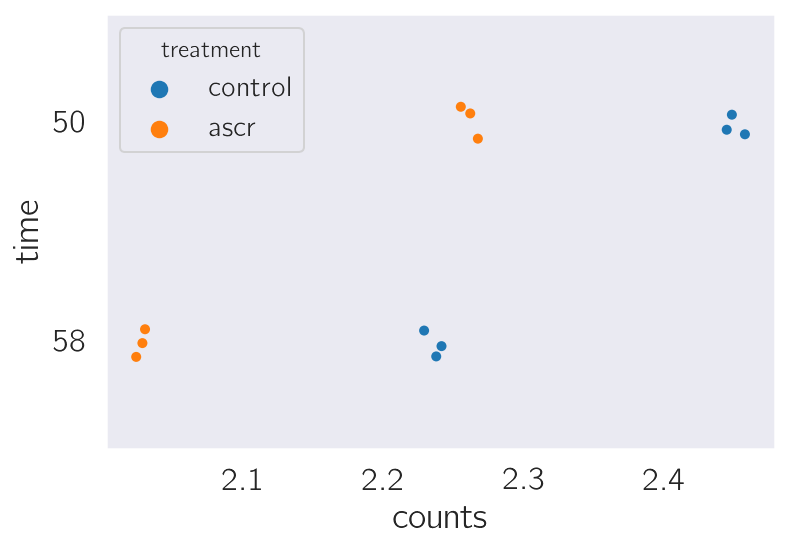

In [48]:
sns.stripplot(data=melted[melted.ensembl_gene_id == 'WBGene00009221'], x='counts', y='time', hue='treatment')

<AxesSubplot:xlabel='counts', ylabel='time'>

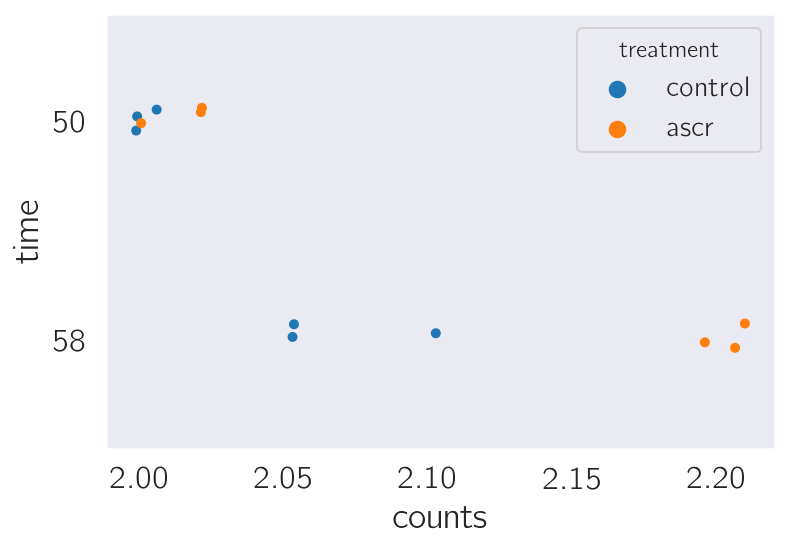

In [49]:
sns.stripplot(data=melted[melted.ensembl_gene_id == 'WBGene00015048'], x='counts', y='time', hue='treatment')

<AxesSubplot:xlabel='counts', ylabel='time'>

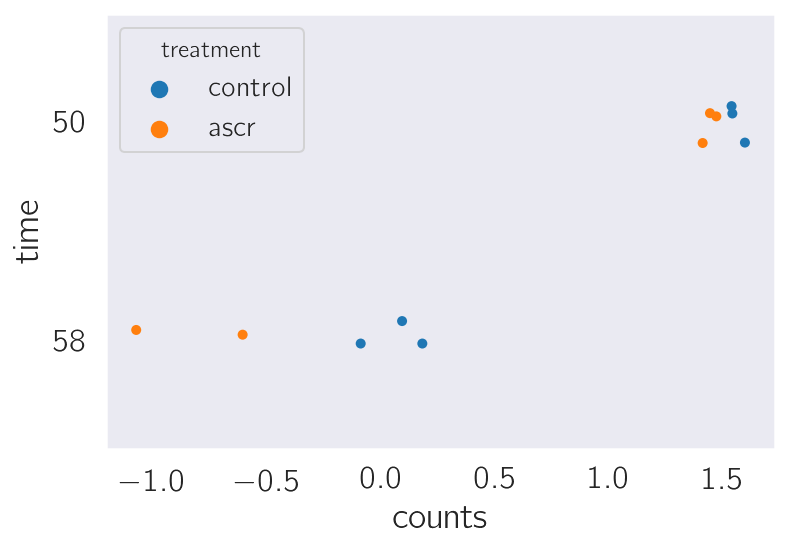

In [50]:
sns.stripplot(data=melted[melted.ensembl_gene_id == 'WBGene00004099'], x='counts', y='time', hue='treatment')